In [1]:
'''
Title: Titanic Survival Analysis - Exploratory Data Analysis
Name: Daniel Muthama
Date: 30 May 2025
Dataset: https://www.kaggle.com/competitions/titanic
'''

# Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv('train_and_test2.csv')


# Rename columns
df = df.rename(columns={
    '2urvived': 'Survived',
    'Sex': 'Gender',
    'Pclass': 'PassengerClass',
    'sibsp': 'SiblingsSpouses',
    'Parch': 'ParentsChildren',
    'Embarked': 'EmbarkPort'
})

# Map numerical values to categorical labels
df['Gender'] = df['Gender'].map({0: 'Male', 1: 'Female'})
df['EmbarkPort'] = df['EmbarkPort'].map({0.0: 'Cherbourg', 1.0: 'Queenstown', 2.0: 'Southampton'})

# Drop all-zero columns
zero_cols = [col for col in df.columns if 'zero' in col]
df = df.drop(columns=zero_cols)

# Fill missing values
df['EmbarkPort'] = df['EmbarkPort'].fillna(df['EmbarkPort'].mode()[0])

# Cap fare outliers
Q1 = df['Fare'].quantile(0.25)
Q3 = df['Fare'].quantile(0.75)
IQR = Q3 - Q1
upper_limit = Q3 + 3*IQR
df['Fare'] = np.where(df['Fare'] > upper_limit, upper_limit, df['Fare'])

print("Cleaned Columns:", df.columns.tolist())

Cleaned Columns: ['Passengerid', 'Age', 'Fare', 'Gender', 'SiblingsSpouses', 'ParentsChildren', 'PassengerClass', 'EmbarkPort', 'Survived']


In [2]:
# 2. INITIAL DATA EXPLORATION
print("\n=== INITIAL DATA EXPLORATION ===")
print(f"Dataset Dimensions: {df.shape}")
print("\nFirst 5 Rows:")
print(df.head())
print("\nData Types and Missing Values:")
print(df.info())
print("\nSummary Statistics:")
print(df.describe(include='all'))
print("\nUnique Values per Column:")
print(df.nunique())
print(f"\nDuplicate Rows: {df.duplicated().sum()}")



=== INITIAL DATA EXPLORATION ===
Dataset Dimensions: (1309, 9)

First 5 Rows:
   Passengerid   Age     Fare  Gender  SiblingsSpouses  ParentsChildren  \
0            1  22.0   7.2500    Male                1                0   
1            2  38.0  71.2833  Female                1                0   
2            3  26.0   7.9250  Female                0                0   
3            4  35.0  53.1000  Female                1                0   
4            5  35.0   8.0500    Male                0                0   

   PassengerClass   EmbarkPort  Survived  
0               3  Southampton         0  
1               1    Cherbourg         1  
2               3  Southampton         1  
3               1  Southampton         1  
4               3  Southampton         0  

Data Types and Missing Values:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           ------


=== UNIVARIATE ANALYSIS ===


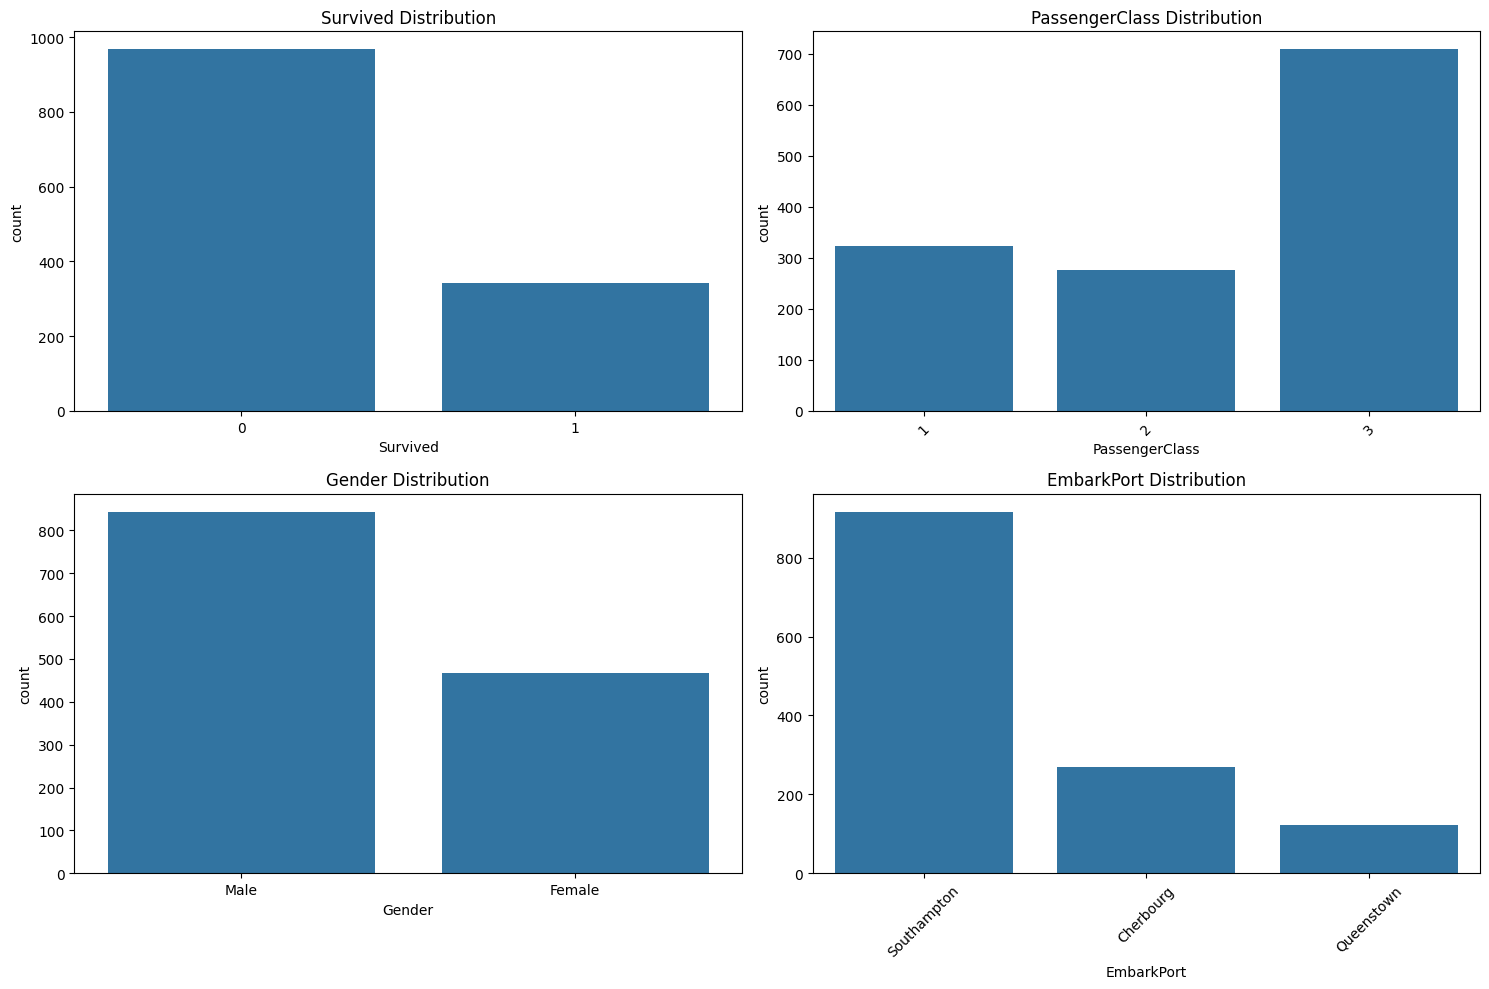

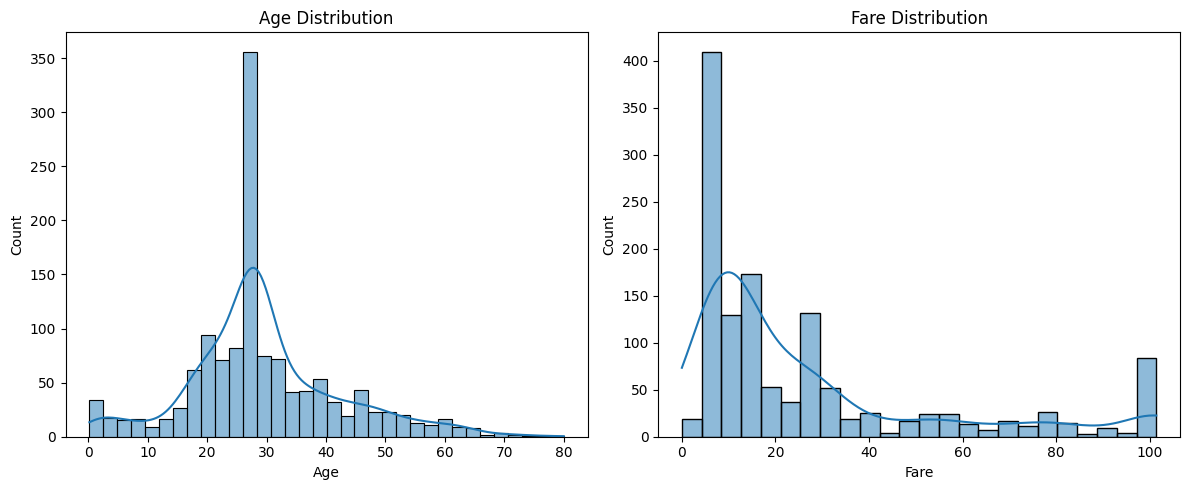

In [3]:
# 3. UNIVARIATE ANALYSIS
print("\n=== UNIVARIATE ANALYSIS ===")
# Categorical features
cat_cols = ['Survived', 'PassengerClass', 'Gender', 'EmbarkPort']
plt.figure(figsize=(15, 10))
for i, col in enumerate(cat_cols, 1):
    plt.subplot(2, 2, i)
    sns.countplot(x=df[col])
    plt.title(f'{col} Distribution')
    plt.xlabel(col)
    plt.xticks(rotation=45 if df[col].nunique() > 2 else 0)
plt.tight_layout()
plt.savefig('categorical_distributions.png')
plt.show()

# Numerical features
num_cols = ['Age', 'Fare']
plt.figure(figsize=(12, 5))
for i, col in enumerate(num_cols, 1):
    plt.subplot(1, 2, i)
    sns.histplot(df[col], kde=True)
    plt.title(f'{col} Distribution')
    plt.xlabel(col)
plt.tight_layout()
plt.savefig('numerical_distributions.png')
plt.show()


=== BIVARIATE ANALYSIS ===


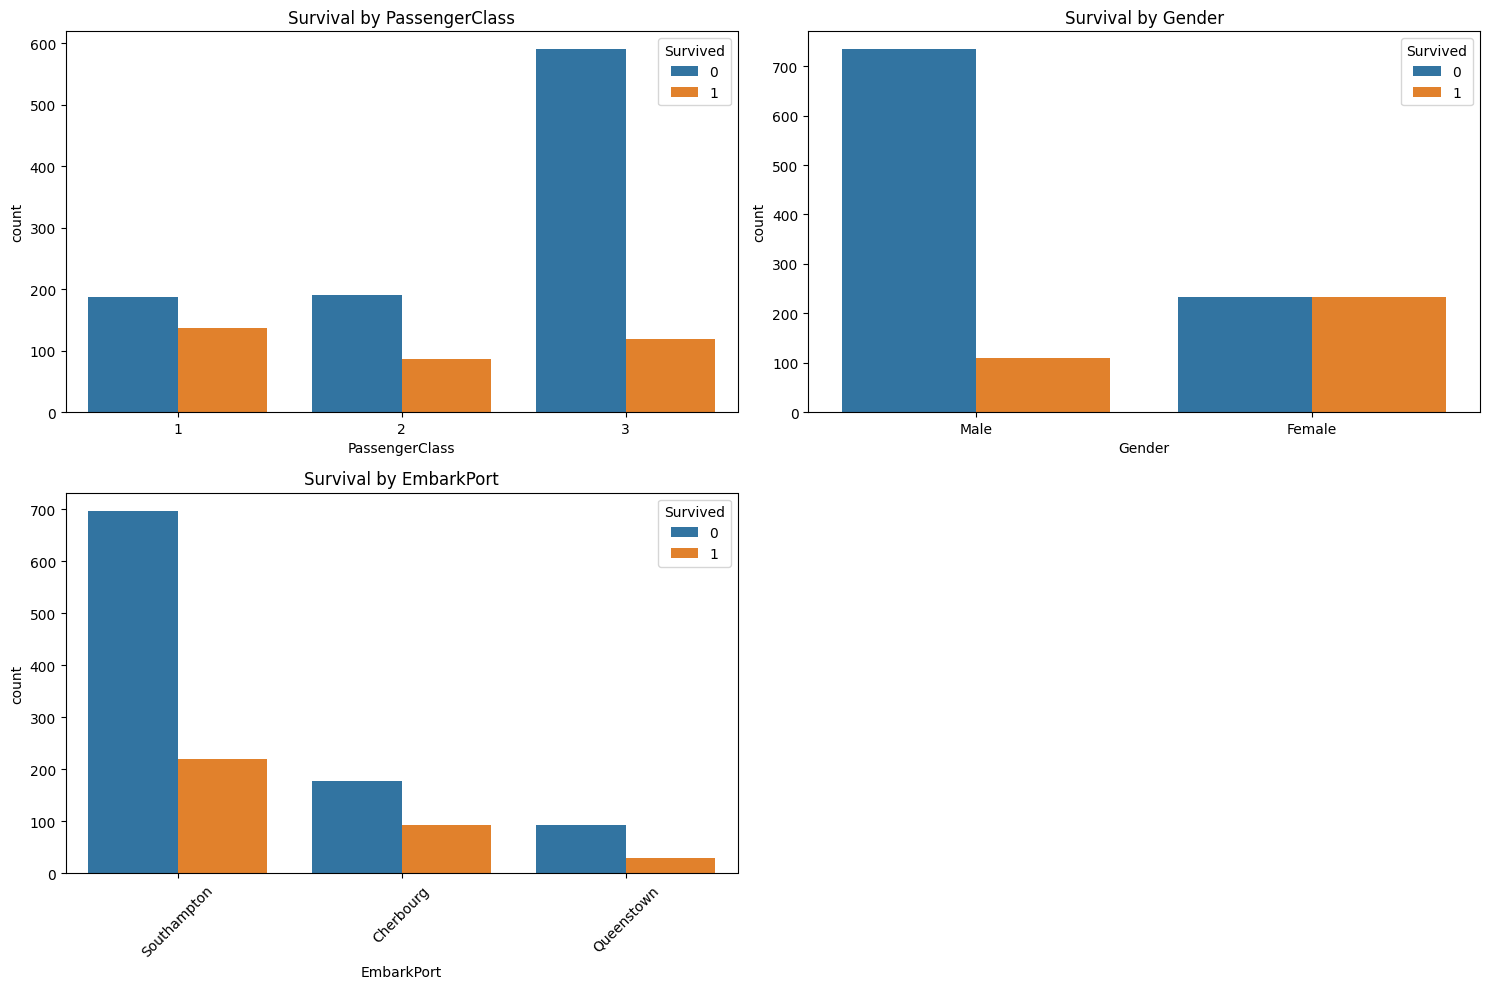

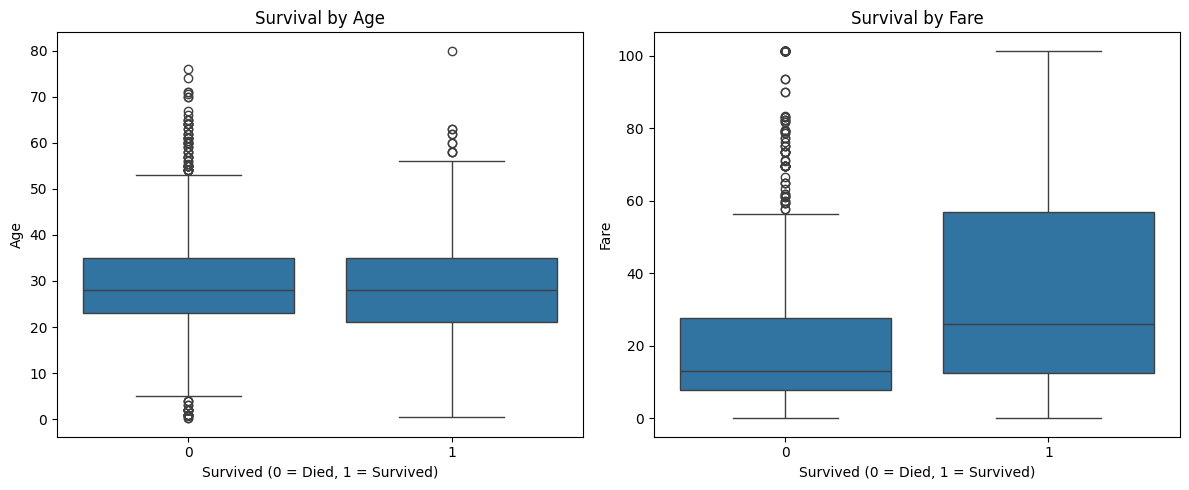

In [4]:
# 4. BIVARIATE ANALYSIS
print("\n=== BIVARIATE ANALYSIS ===")
# Survival vs categorical features
plt.figure(figsize=(15, 10))
for i, col in enumerate(['PassengerClass', 'Gender', 'EmbarkPort'], 1):
    plt.subplot(2, 2, i)
    sns.countplot(x=df[col], hue=df['Survived'])
    plt.title(f'Survival by {col}')
    plt.xlabel(col)
    plt.xticks(rotation=45 if col == 'EmbarkPort' else 0)
plt.tight_layout()
plt.savefig('survival_categorical.png')
plt.show()

# Survival vs numerical features
plt.figure(figsize=(12, 5))
for i, col in enumerate(['Age', 'Fare'], 1):
    plt.subplot(1, 2, i)
    sns.boxplot(x=df['Survived'], y=df[col])
    plt.title(f'Survival by {col}')
    plt.xlabel('Survived (0 = Died, 1 = Survived)')
    plt.ylabel(col)
plt.tight_layout()
plt.savefig('survival_numerical.png')
plt.show()



=== MULTIVARIATE ANALYSIS ===


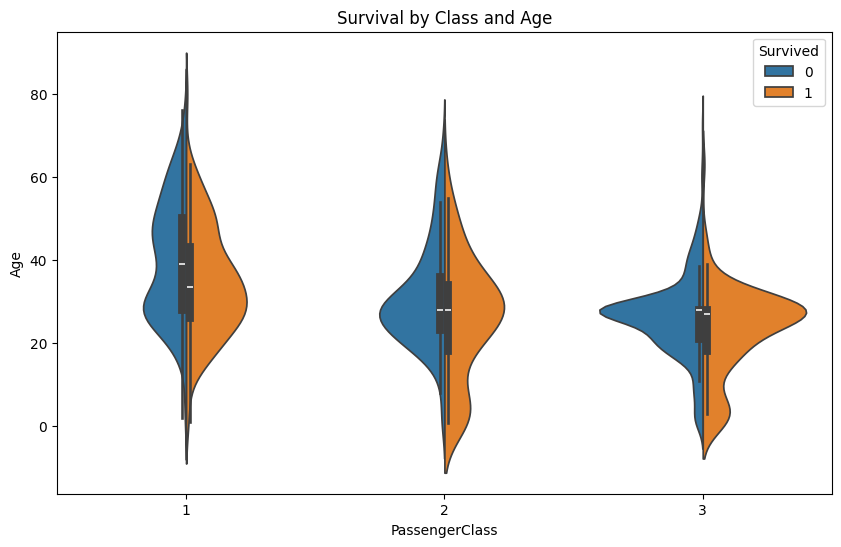

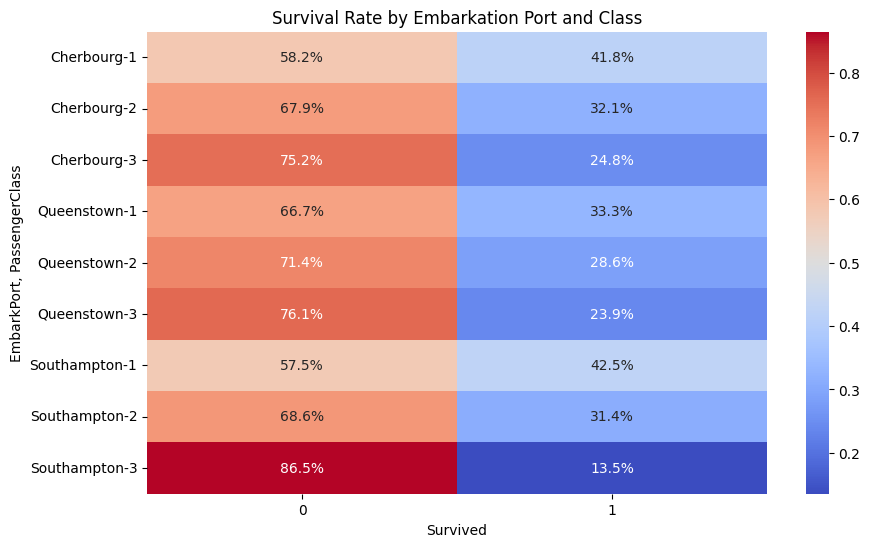

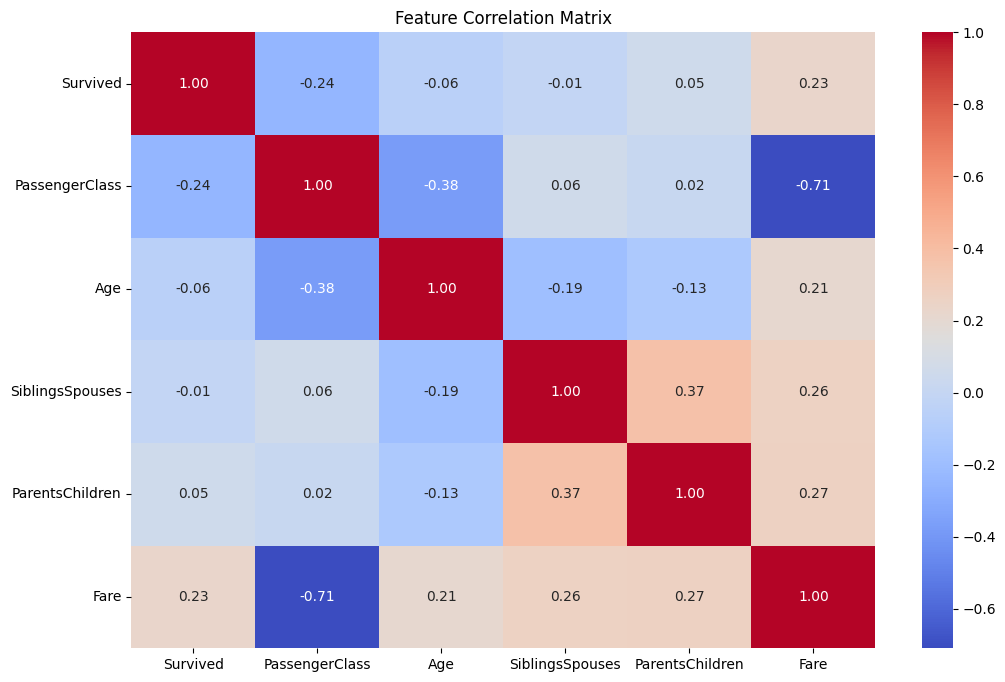

In [5]:
# 5. MULTIVARIATE ANALYSIS
print("\n=== MULTIVARIATE ANALYSIS ===")
# Interaction: Class, Age, and Survival
plt.figure(figsize=(10, 6))
sns.violinplot(x=df['PassengerClass'], y=df['Age'], hue=df['Survived'], split=True)
plt.title('Survival by Class and Age')
plt.savefig('pclass_age_survival.png')
plt.show()

# Interaction: EmbarkPort, PassengerClass, and Survival
plt.figure(figsize=(10, 6))
sns.heatmap(
    pd.crosstab(
        [df['EmbarkPort'], df['PassengerClass']], 
        df['Survived'],
        normalize='index'
    ),
    annot=True, fmt='.1%', cmap='coolwarm'
)
plt.title('Survival Rate by Embarkation Port and Class')
plt.xlabel('Survived')
plt.ylabel('EmbarkPort, PassengerClass')
plt.savefig('embarkport_class_survival.png')
plt.show()

# Correlation matrix
plt.figure(figsize=(12, 8))
corr = df[['Survived', 'PassengerClass', 'Age', 'SiblingsSpouses', 'ParentsChildren', 'Fare']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Feature Correlation Matrix')
plt.savefig('correlation_matrix.png')
plt.show()


=== TARGET VARIABLE (SURVIVED) ANALYSIS ===


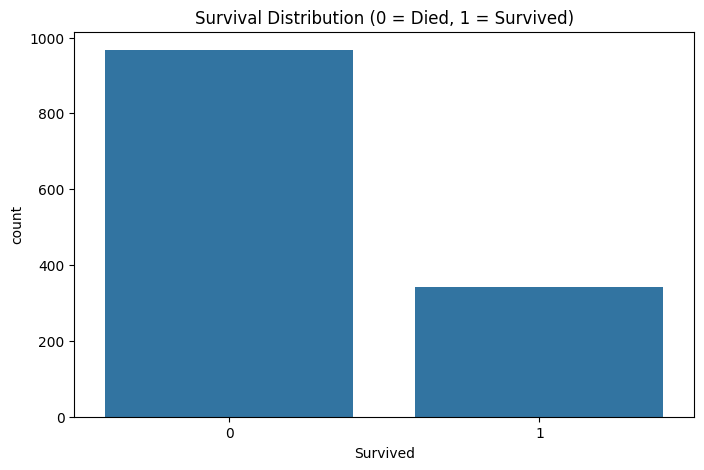

Survival Rate: 26.1%


/tmp/ipykernel_2221087/3551839300.py:15: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df, x='Sex', y='Survived', ci=None)


ValueError: Could not interpret value `Sex` for `x`. An entry with this name does not appear in `data`.

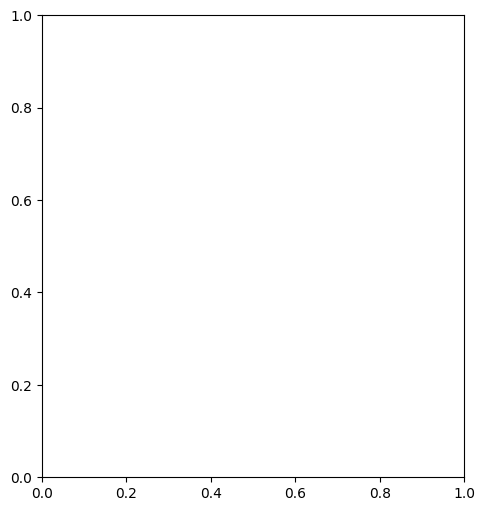

In [6]:
# 6. TARGET VARIABLE ANALYSIS
print("\n=== TARGET VARIABLE (SURVIVED) ANALYSIS ===")
# Target distribution
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='Survived')
plt.title('Survival Distribution (0 = Died, 1 = Survived)')
plt.savefig('target_distribution.png')
plt.show()

print(f"Survival Rate: {df['Survived'].mean()*100:.1f}%")

# Key survival factors
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.barplot(data=df, x='Sex', y='Survived', ci=None)
plt.title('Survival Rate by Gender')

plt.subplot(1, 2, 2)
sns.barplot(data=df, x='Pclass', y='Survived', ci=None)
plt.title('Survival Rate by Class')
plt.tight_layout()
plt.savefig('key_survival_factors.png')
plt.show()

# Interactive effect: Class and Gender
plt.figure(figsize=(10, 6))
sns.pointplot(data=df, x='Pclass', y='Survived', hue='Sex', ci=None)
plt.title('Survival Rate: Class-Gender Interaction')
plt.savefig('class_gender_interaction.png')
plt.show()

print("\n=== ANALYSIS COMPLETE ===")